In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import glob

In [5]:
import os

current_path = os.getcwd()
print("当前路径:", current_path)  # 输出示例: /Users/yourname/projects

当前路径: /media/desk16/iy66914


In [20]:
new_path = "/media/desk16/iy66914/JZF"
os.chdir(new_path)
adata = sc.read_h5ad("./adata_cluster.h5ad")

In [19]:
adata1=adata

In [9]:
adata

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_v

In [6]:
all_data_dir = "/media/desk16/iy66914/JZF/std_file/scRNA"
import os
all_data_dir_list = os.listdir(all_data_dir)

In [39]:
all_data_dict = {}
for sample_dir in all_data_dir_list:
    all_data_dict[sample_dir] = f"{all_data_dir}/{sample_dir}"
all_data_dict

{'HTJT': '/media/desk16/iy66914/JZF/std_file/scRNA/HTJT',
 'CQFP': '/media/desk16/iy66914/JZF/std_file/scRNA/CQFP',
 'DLHT': '/media/desk16/iy66914/JZF/std_file/scRNA/DLHT',
 'HTJP': '/media/desk16/iy66914/JZF/std_file/scRNA/HTJP',
 'ZMMP': '/media/desk16/iy66914/JZF/std_file/scRNA/ZMMP',
 'WDHT': '/media/desk16/iy66914/JZF/std_file/scRNA/WDHT',
 'CYWP': '/media/desk16/iy66914/JZF/std_file/scRNA/CYWP',
 'CQFT': '/media/desk16/iy66914/JZF/std_file/scRNA/CQFT',
 'ZMMT': '/media/desk16/iy66914/JZF/std_file/scRNA/ZMMT',
 'WDHP': '/media/desk16/iy66914/JZF/std_file/scRNA/WDHP',
 'QXPP': '/media/desk16/iy66914/JZF/std_file/scRNA/QXPP',
 'DLHP': '/media/desk16/iy66914/JZF/std_file/scRNA/DLHP',
 'QXPT': '/media/desk16/iy66914/JZF/std_file/scRNA/QXPT',
 'CYWT': '/media/desk16/iy66914/JZF/std_file/scRNA/CYWT'}

In [53]:
adatas = {}
for sample_id, path in all_data_dict.items():
    #path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_mtx(
    path,                # 存放文件的目录
    var_names='gene_symbols', # 使用基因符号作为列名（也可用 'gene_ids'）
    make_unique=True         # 处理重复基因符号
    )
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

sample
DLHP    16277
QXPP    14656
WDHT    12900
QXPT    12853
HTJT    12211
ZMMT    11008
DLHT    10886
HTJP    10803
CQFT    10800
CYWT    10646
CYWP    10464
WDHP    10462
ZMMP     9503
CQFP     9105
Name: count, dtype: int64


/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 162574 × 25365
    obs: 'sample'

In [54]:
adata.layers["counts"] = adata.X.copy()

In [55]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

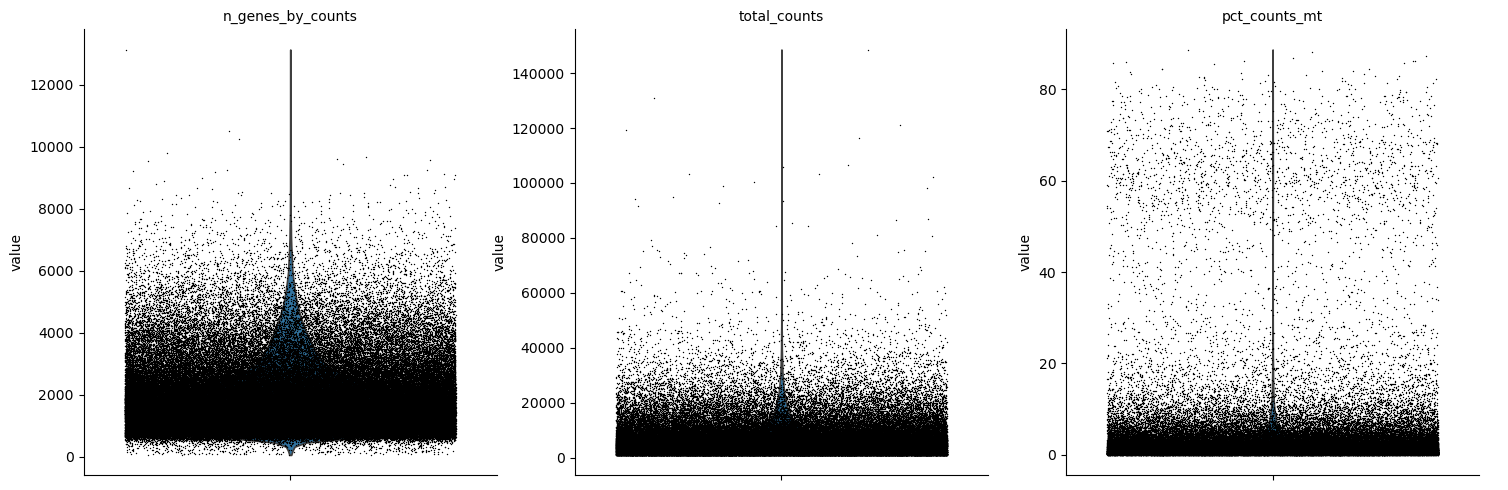

In [56]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

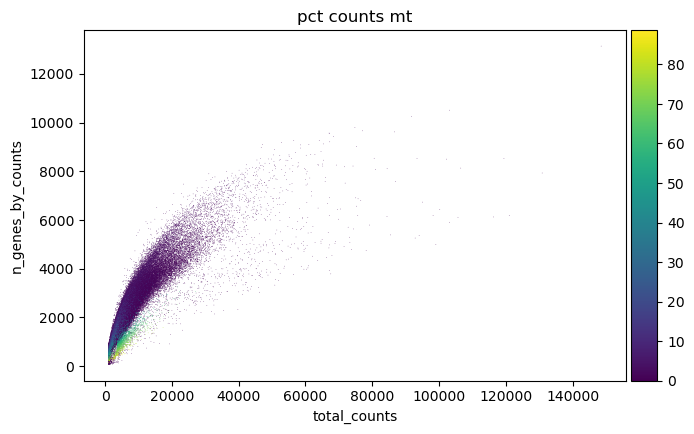

In [43]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [47]:
adata.obs.keys()

Index(['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb'],
      dtype='object')

In [57]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [58]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_ribo > 3, :]
adata = adata[adata.obs.pct_counts_mt < 30, :].copy()

In [ ]:
#adata.obsm.keys()
adata.obs["sample"].unique()

In [59]:
#adata.obs.shape
#adata.obs.keys()
adata

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

In [10]:
# 基因集来自Seurat
s_genes = [
    "MCM5", "PCNA", "TYMS", "FEN1", "MCM2", "MCM4", "RRM1",
    "UNG", "GINS2", "MCM6", "CDCA7", "DTL", "PRIM1", "UHRF1",
    "HELLS", "RFC2", "RPA2", "NASP", "RAD51AP1", "GMNN", "WDR76",
    "SLBP", "CCNE2", "UBR7", "POLD3", "MSH2", "ATAD2", "RAD51",
    "RRM2", "CDC45", "CDC6", "EXO1", "TIPIN", "DSCC1", "BLM",
    "CASP8AP2", "USP1", "CLSPN", "POLA1", "CHAF1B", "BRIP1", "E2F8"
]

g2m_genes = [
    "HMGB2", "CDK1", "NUSAP1", "UBE2C", "BIRC5", "TPX2", "TOP2A", "NDC80",
    "CKS2", "NUF2", "CKS1B", "MKI67", "TMPO", "CENPF", "TACC3", "SMC4",
    "CCNB2", "CKAP2L", "CKAP2", "AURKB", "BUB1", "KIF11", "ANP32E", "TUBB4B",
    "GTSE1", "KIF20B", "HJURP", "CDCA3", "CDC20", "TTK", "CDC25C", "KIF2C",
    "RANGAP1", "NCAPD2", "DLGAP5", "CDCA2", "CDCA8", "ECT2", "KIF23", "HMMR",
    "AURKA", "PSRC1", "ANLN", "LBR", "CKAP5", "CENPE", "CTCF", "NEK2",
    "G2E3", "GAS2L3", "CBX5", "CENPA"
]


# 细胞周期评估
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [94]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,leiden_res_0.80,leiden_res_1.00,leiden_res_1.20,leiden_res_1.40,leiden_res_1.60,leiden_res_1.80,leiden_res_2.00,S_score,G2M_score,phase
CELL1_N2,HTJT,1246,7.128496,2641.0,7.879292,26.656569,38.394548,51.419917,71.753124,65.0,...,0,0,0,0,0,0,0,0.003318,0.019487,G2M
CELL2_N2,HTJT,2520,7.832411,7083.0,8.865594,31.342651,39.248906,48.722293,64.097134,102.0,...,4,3,3,4,1,2,2,-0.005169,-0.084757,G1
CELL8_N3,HTJT,1268,7.145984,3866.0,8.260234,36.575272,51.733057,65.028453,80.134506,86.0,...,2,5,6,5,2,3,3,-0.029017,-0.067922,G1
CELL10_N2,HTJT,1288,7.161622,3901.0,8.269244,35.324276,50.499872,63.342733,79.800051,32.0,...,0,0,0,0,0,0,0,-0.026305,-0.013071,G1
CELL11_N2,HTJT,1467,7.291656,4106.0,8.320448,32.951778,45.372625,57.866537,74.963468,38.0,...,6,6,8,7,6,8,9,-0.023555,-0.034693,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CELL28543_N1-1,CYWT,1108,7.011214,2141.0,7.669495,25.502102,37.365717,50.910789,71.602055,28.0,...,16,17,2,3,13,23,16,-0.018941,-0.008932,G1
CELL28544_N1,CYWT,1207,7.096721,2099.0,7.649693,25.107194,35.445450,47.260600,66.317294,38.0,...,6,6,8,7,7,9,8,-0.046792,-0.004522,G1
CELL28545_N1-2,CYWT,1063,6.969791,1817.0,7.505492,25.866813,36.213539,48.706659,69.014860,22.0,...,6,6,8,7,7,9,8,-0.013455,0.002975,G2M
CELL28547_N1-3,CYWT,812,6.700731,1355.0,7.212295,27.601476,39.704797,54.686347,76.974170,8.0,...,6,6,8,7,7,9,8,-0.032863,-0.038622,G1


In [11]:
cell_cycle_genes = s_genes+g2m_genes

/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


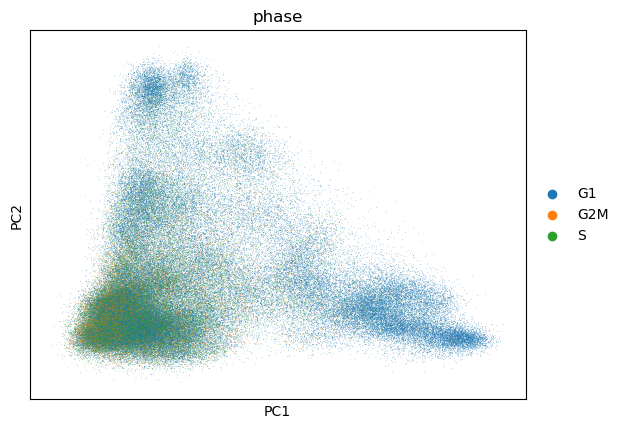

In [96]:
adata_raw = adata.copy()
adata_cc_genes = adata_raw[:, cell_cycle_genes]
sc.pp.scale(adata_cc_genes, max_value=10)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [1]:
import igraph
print(igraph.__version__)

0.11.8


In [12]:
# 回归掉 S/G2M 分数
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


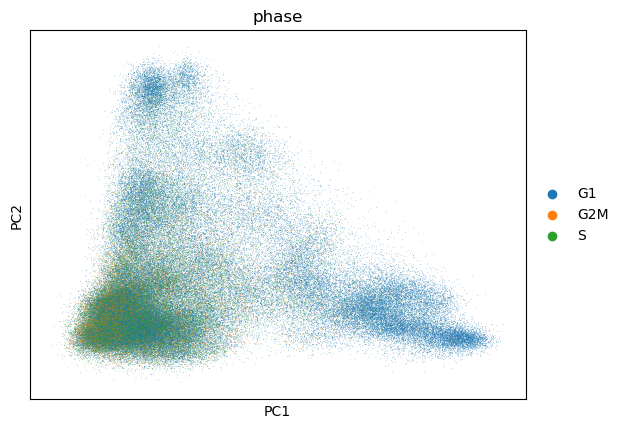

In [24]:
adata_cc_genes = adata1[:, cell_cycle_genes]
# 重新 scale
sc.pp.scale(adata_cc_genes, max_value=10)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [22]:
#print("基因ENSG00000100001前5个细胞值:", adata_raw[:5, 'ENSG00000100001'].X.toarray().ravel())
adata1.X[:10, :5]

array([[-0.00208872, -0.00080772, -0.03053047, -0.00149395, -0.00861506],
       [-0.00223081, -0.00188629, -0.03029778, -0.00224954, -0.00994499],
       [-0.00236327, -0.00188993, -0.03093911, -0.00247423, -0.01040952],
       [-0.00229932, -0.00133478, -0.03110355, -0.00210077, -0.00975699],
       [-0.00230099, -0.00152669, -0.0309473 , -0.00219548, -0.00991134],
       [-0.0021699 , -0.00162325, -0.03022682, -0.00202109, -0.00952915],
       [-0.00240924, -0.00132632, -0.03164557, -0.00228172, -0.01013358],
       [-0.00235987, -0.00167941, -0.0311029 , -0.0023677 , -0.01023474],
       [-0.00227341, -0.0015064 , -0.03083051, -0.00213935, -0.00979952],
       [-0.0024847 , -0.00140569, -0.03194474, -0.00244673, -0.01045804]])

In [23]:
adata.X[:10, :5]

<10x5 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [29]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1)
# Logarithmize the data
sc.pp.log1p(adata1)

/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:385: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [30]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000, batch_key="sample")

/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


KeyError: '[nan] not in index'

In [ ]:
sc.pl.highly_variable_genes(adata1)

In [ ]:
sc.tl.pca(adata1,n_comps=30)

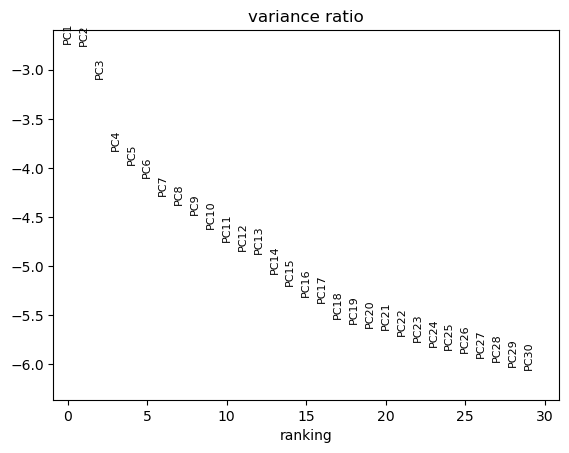

In [31]:
sc.pl.pca_variance_ratio(adata1, n_pcs=30, log=True)

In [ ]:
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [65]:
sc.pp.scrublet(adata, batch_key="sample")

In [67]:
#pip install  harmonypy 
import harmonypy as hm
import scanpy.external as sce

In [ ]:
sce.pp.harmony_integrate(
    adata, 
    key='sample',         # 批次列名
    theta=2,              # 批次校正力度
    max_iter_harmony=20   # 最大迭代次数
)

2025-06-09 19:20:21,886 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-06-09 19:20:33,665 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-06-09 19:20:34,925 - harmonypy - INFO - Iteration 1 of 20
2025-06-09 19:22:02,671 - harmonypy - INFO - Iteration 2 of 20
2025-06-09 19:23:28,241 - harmonypy - INFO - Iteration 3 of 20
2025-06-09 19:24:56,488 - harmonypy - INFO - Iteration 4 of 20


In [ ]:
sc.pp.neighbors(adata,n_neighbors=30, n_pcs=20)

/tmp/ipykernel_3531227/3704399362.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_bbknn)


/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/media/desk16/iy66914/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


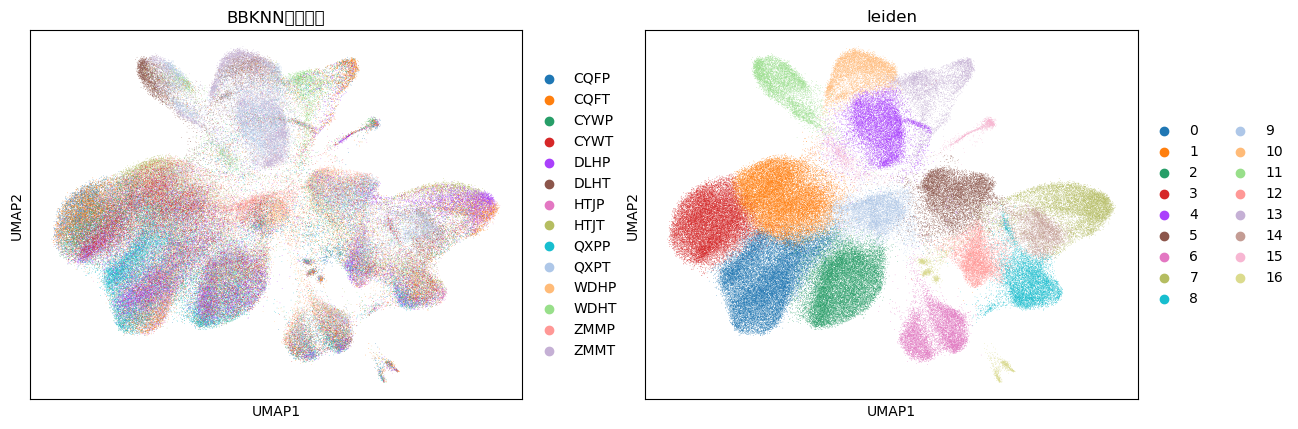

In [34]:
import bbknn
# sc.external.pp.bbknn(adata, batch_key="sample")
# 保存一份用于对比
adata_bbknn = adata1.copy()

# 1. 使用 BBKNN 整合邻接图（基于 harmony 的输出）
sc.external.pp.bbknn(adata_bbknn, batch_key='sample')
sc.tl.umap(adata_bbknn)
sc.tl.leiden(adata_bbknn)
sc.pl.umap(adata_bbknn, color=["sample", "leiden"], title="BBKNN整合效果")

In [86]:
adata.obsm.keys()
#adata.uns['neighbors']

KeysView(AxisArrays with keys: X_pca, X_pca_harmony, X_umap)

In [35]:
sc.tl.umap(adata_bbknn)

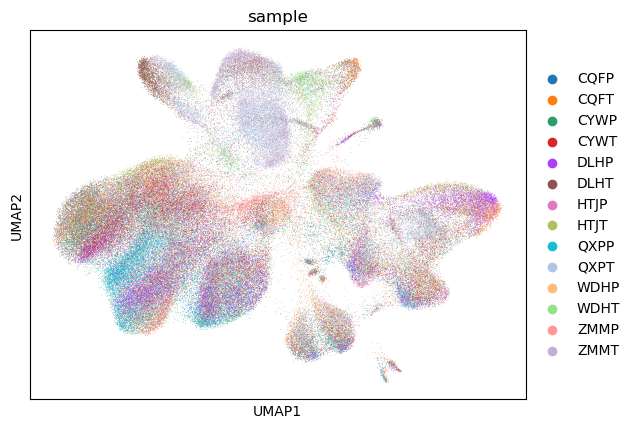

In [36]:
sc.pl.umap(adata_bbknn, color=["sample"])

In [89]:
for res in np.arange(0.2, 2.01, 0.2):
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [75]:
adata.obs.columns

Index(['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score',
       'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40',
       'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00',
       'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60',
       'leiden_res_1.80', 'leiden_res_2.00'],
      dtype='object')

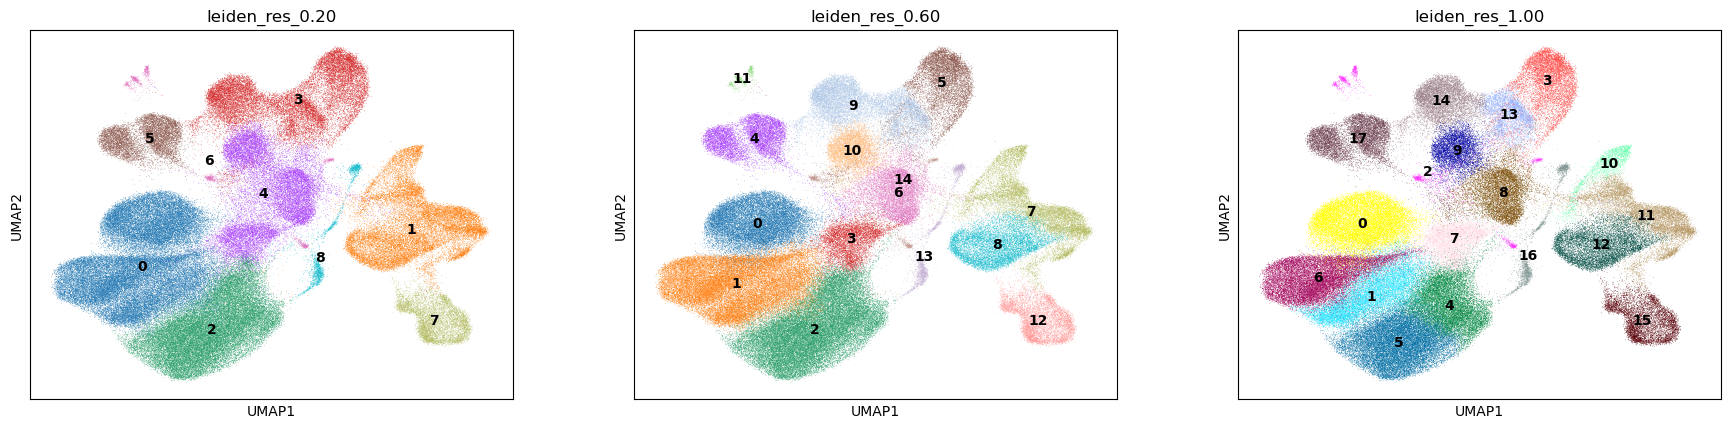

In [46]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.20", "leiden_res_0.60", "leiden_res_1.00"],
    legend_loc="on data",
)

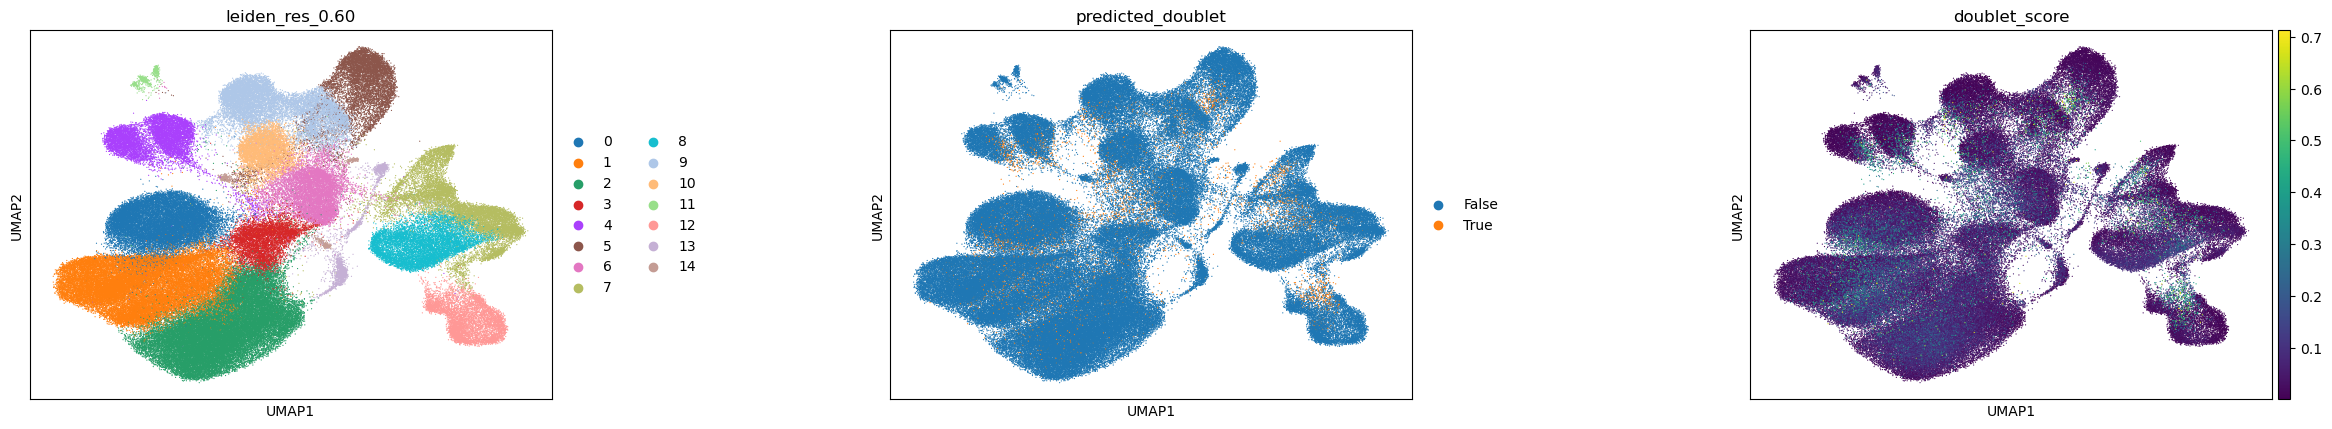

In [91]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.60", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

In [ ]:
adata.obs["leiden"] = adata.obs["leiden_res_0.60"]

In [100]:
adata.write("./adata_cluster.h5ad")

In [44]:
marker_genes = { 
  "Immu": ["PTPRC"],
  "Mast cells":["TPSAB1"],
  "ILC":["KIT","KLRF1"],
  "Cell Cycle" :["TOP2A","MKI67"],
  "Monocyte":["CD68","FCGR3A","CD14","MARCO"],
  "B cells":["CD79A","CD79B","CD19","MS4A1"],
  "Plasma cells":["JCHAIN","IGKC"],
  "platelets":["PF4", "PPBP"], #,"GP9"
  "T cells":["CD3D","CD3E","CD3G"],
  "CD4+ T cells":["CD4"],
  "CD8+ T cells":["CD8A","CD8B"],
  "NK" :["NKG7","KLRG1","KLRC1"],
  "DC":["CD1C","LAMP3"] ,
    "Macro":["CD68","LYZ","MSR1","CD163","MRC1"],
  "Neu":["FCGR3B","CXCR2","SLC25A37","G0S2","CXCR1","ADGRG3"],
    "Epi": ["EPCAM", "KRT18",  "KRT19"],
    "Endo": ["PECAM1", "VWF", "CDH5", "ENG", "TIE1", "CLDN5"],
    "Fibroblasts": ["PDGFRA", "PDGFRB", "COL1A1", "COL1A2", "DCN", "FAP"], #, "LUM"
    "Myofibroblasts": ["ACTA2", "TAGLN", "MYH11"],
    "Pericytes": ["RGS5", "PDGFRB", "CSPG4", "MCAM", "ACTA2"]
}

In [47]:
marker_genes = { 
  "Myofibroblast": ["MYL9","MYH11"],
  "Cholangiocyte":["EPCAM", "KRT7",  "KRT19"],
  "HSC":["COL1A1", "COL3A1", "DCN"],
  "Hepatocyte" :["APOC3","HP","ALB"],
     "Mast cells":["TPSAB1","CPA3","MS4A2"],
  "Endothelial":["PECAM1","CDH5", "TIE1", "CLDN5"],
  #"Macro/mono":["CD79A","CD79B","CD19","MS4A1"],
  "Myeloid": ["CD14","MS4A7","FCGR3A"],
  "Neutrophil":["C1QA","G0S2"],
    "B cells":["CD79A","CD79B","CD19","MS4A1"],
     "Plasma cells":["IGKC","JCHAIN","MZB1"],
    "T cell":["CD3D","CD3E","CD3G"],
     "NK" :["NKG7","KLRG1","KLRC1"]}

In [39]:
adata

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_v

In [41]:
adata1

AnnData object with n_obs × n_vars = 157988 × 25365
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.20', 'leiden_res_0.40', 'leiden_res_0.60', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.20', 'leiden_res_1.40', 'leiden_res_1.60', 'leiden_res_1.80', 'leiden_res_2.00', 'S_score', 'G2M_score', 'phase'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_v

In [2]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_1.00", standard_scale="var")

NameError: name 'adata' is not defined

In [ ]:
adata.obs["cell_type_lvl1"] = adata.obs["leiden"].map(
    {
        "0": "B Cells",
        "1": "Neutro",
        "2": "CD4+ T",
        "3": "gammaDelta T",
        "4": "CD8+ T",
        "5": "CD8+ T",
        "6": "CD8+ T",
        "7": "T unknown",
        "8": "Plasma",
        "9": "NK",
        "10": "Macro",
        "11": "Mono",
        "12": "Mono",
        "13": "Epi",
        "14": "Mast",
        "15": "Stroma"
    }
)

In [ ]:
sc.pl.umap(
    adata,
    color=["cell_type_lvl1"],
    legend_loc="on data"
)